## Load data files

In [1]:
import pandas as pd
from sklearn.metrics import *
binary = True
n_logits = 2 if binary else 3
for data_format in ['token', 'morph']:
    train_df = pd.read_csv(f'../{data_format}_train.tsv', sep='\t', header=None, names=['comment', 'label'])
    train_df['is_valid'] = False
    test_df = pd.read_csv(f'../{data_format}_test.tsv', sep='\t', header=None, names=['comment', 'label'])
    test_df['is_valid'] = True
    df = pd.concat([train_df,test_df], sort=False)
    df = df.drop_duplicates('comment')
    if binary: df = df[df.label != 2]
    train_df = df[df.is_valid == False].drop('is_valid', axis=1)
    test_df = df[df.is_valid == True].drop('is_valid', axis=1)
    train_df.to_csv(f'../{data_format}_train_clean.tsv', sep='\t', header=None, index=False)
    test_df.to_csv(f'../{data_format}_test_clean.tsv', sep='\t', header=None, index=False)

In [2]:
import codecs
import re
from keras.utils.np_utils import to_categorical
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def load_data(filename):
    data = pd.read_csv(filename, sep='\t', header=None, names=['comment', 'label'])
    x, y = data.comment, data.label
    x = np.asarray(list(x))
    # Reducing any char-acter sequence of more than 3 consecutive repetitions to a respective 3-character sequence 
    # (e.g. “!!!!!!!!”turns to “!!!”)
    # x = [re.sub(r'((.)\2{3,})', r'\2\2\2', i) for i in x]
    y = to_categorical(y, n_logits)
    return x, y
    
version = '_clean'
x_token_train, y_token_train = load_data(f'../token_train{version}.tsv')
x_token_test, y_token_test = load_data(f'../token_test{version}.tsv')
x_morph_train, y_morph_train = load_data(f'../morph_train{version}.tsv')
x_morph_test, y_morph_test = load_data(f'../morph_test{version}.tsv')

print('X token train shape: {}'.format(x_token_train.shape))
print('X token test shape: {}'.format(x_token_test.shape))

print('X morph train shape: {}'.format(x_morph_train.shape))
print('X morph test shape: {}'.format(x_morph_test.shape))

Using TensorFlow backend.


X token train shape: (7278,)
X token test shape: (1103,)
X morph train shape: (7272,)
X morph test shape: (1104,)


In [3]:
print(x_token_train[:5])

['ממש כואב ..... אני בוכה עם המשפחה שלא תדעו עוד צער' 'איש יקר שלנו'
 'כל הכבוד והמון בהצלחה'
 ' תל חי , רובי . בכל העצב הזה היית קרן אור של תקוה . אכן יש נשיא בישראל '
 'נקי כפיים ובר לבב בהצלחה לך ולנו .']


In [4]:
print(x_token_test[:5])

[' שמע ישראל , השם ישמור ויקרא הגורל = ( י.ק.ו.ק . ) אימרו אמן לאבא השם שלנו ! ! ! ! אחרי ברכה של ביבי ! הכח בישראל הוא מתי שיש משמעת ופרגמתיות במשרדי החינוך שזה איתן את האור ! שמאוד חסר לנו ! , והתאחדות באחד שלם , ואין שמאל ואין ימין ! ובישראל נקודה חשובה היא , תעשיית כוח פרגמטיבית ! https://www.youtube.com/watch?v=_rKMXgPQSj8 . עוד מעת אהיה ראש חודש תעברו על ה תפילה של התיקון הכללי ו תדליקו את הנר ! '
 'איחולי הצלחה בתפקידך .'
 ' בוקר טוב ישראל בוקר טוב לכבוד נשיא מדינת ישראל . ״ אשרי העם שנבחר אדם עשיר בענווה , יושרה ודעת ״ מי ייתן ותאחד את עמך ישראל . יישר כוח . עופר אלפסי מאילת . '
 'איפה הגינוי ? http://www.iba.org.il/bet/bet.aspx?type=1&entity=1023105'
 'נכון שמאחרת לברך ונכון שאני הקטנה מכולם אבל לא האחרונה לברך אני מאמינה בהצלחה רבה . באחדות בעזרת השם שבת שלום']


In [5]:
print(x_morph_train[:5])

['ממש כואב ..... אני בכה את היא עם ה משפחה ש לא תדעו עוד צער'
 'איש יקר של אנחנו' 'כל ה כבוד ו המון ב הצלחה'
 ' תל חי , רובי . ב כל ה עצב ה זה היית קרן אור של תקוה . אכן יש נשיא ב ישראל '
 'נקי כפיים ו בר לבב ב הצלחה ל אתה ו ל אנחנו .']


In [6]:
print(x_morph_test[:5])

[' שמע ישראל , ה שם ישמור ו יקרא ה גורל =  ( י.ק.ו.ק . ) אימרו אמן ל אבא ה שם של אנחנו ! ! ! ! אחרי ברכה של ביבי ! ה כח ב ה ישראל הוא מתי ש יש משמעת ו פרגמתיות ב משרדי ה חינוך ש זה איתן את ה אור ! ש מאוד חסר ל אנחנו ! , ו התאחדות ב אחד שלם , ו אין שמאל ו אין ימין ! ו ב ישראל נקודה חשובה היא , תעשיית כוח פרגמטיבית ! https://www.youtube.com/watch?v=_rKMXgPQSj8 . עוד מעת אהיה ראש חודש תעברו על ה תפילה של ה תיקון ה כללי ו תדליקו את ה נר ! '
 'איחולי הצלחה ב תפקידך .'
 ' בוקר טוב ישראל בוקר טוב לכבוד נשיא מדינת ישראל . ״ אשרי ה עם ש נבחר אדם עשיר ב ענווה , יושרה ו דעת ״  מי ייתן ו תאחד את עמך ישראל . יישר כוח . עופר אלפסי מאילת . '
 'איפה ה גינוי ? http://www.iba.org.il/bet/bet.aspx?type=1&entity=1023105'
 'נכון ש מאחרת לברך ו נכון ש אני ה קטנה מ כולם אבל לא ה אחרונה לברך אני האמין את היא ב הצלחה רבה . ב אחדות ב עזרת ה שם ש בת שלום']


## Prepare
Convert text (train & test) to sequences and pad to requested document length

In [7]:
from keras.preprocessing import text, sequence

def tokenizer(x_train, x_test, vocabulary_size, char_level):
    tokenize = text.Tokenizer(num_words=vocabulary_size, 
                              char_level=char_level,
                              filters='',
                              oov_token='UNK')
    tokenize.fit_on_texts(x_train)  # only fit on train
    print('UNK index: {}'.format(tokenize.word_index['UNK']))
    
    x_train = tokenize.texts_to_sequences(x_train)
    x_test = tokenize.texts_to_sequences(x_test)
    
    return x_train, x_test

def pad(x_train, x_test, max_document_length):
    x_train = sequence.pad_sequences(x_train, maxlen=max_document_length, padding='post', truncating='post')
    x_test = sequence.pad_sequences(x_test, maxlen=max_document_length, padding='post', truncating='post')
    
    return x_train, x_test

vocabulary_size = 5000

x_token_train, x_token_test = tokenizer(x_token_train, x_token_test, vocabulary_size, False)
x_morph_train, x_morph_test = tokenizer(x_morph_train, x_morph_test, vocabulary_size, False)

max_document_length = 100

x_token_train, x_token_test = pad(x_token_train, x_token_test, max_document_length)
x_morph_train, x_morph_test = pad(x_morph_train, x_morph_test, max_document_length)

print('X token train shape: {}'.format(x_token_train.shape))
print('X token test shape: {}'.format(x_token_test.shape))

print('X morph train shape: {}'.format(x_morph_train.shape))
print('X morph test shape: {}'.format(x_morph_test.shape))

UNK index: 1
UNK index: 1
X token train shape: (7278, 100)
X token test shape: (1103, 100)
X morph train shape: (7272, 100)
X morph test shape: (1104, 100)


## Plot function

In [8]:
import matplotlib.pyplot as plt

def plot_loss_and_accuracy(history):
    
    fig, axs = plt.subplots(1, 2, sharex=True)
    
    axs[0].plot(history.history['loss'])
    axs[0].plot(history.history['val_loss'])
    axs[0].set_title('Model Loss')
    axs[0].legend(['Train', 'Validation'], loc='upper left')
    
    axs[1].plot(history.history['accuracy'])
    axs[1].plot(history.history['val_accuracy'])
    axs[1].set_title('Model Accuracy')
    axs[1].legend(['Train', 'Validation'], loc='upper left')
    
    fig.tight_layout()
    plt.show()

## Import required modules from Keras

In [9]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input, Concatenate
from keras.layers import Embedding
from keras.layers import LSTM, Bidirectional
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import MaxPool1D
from keras.layers import BatchNormalization
from keras import optimizers
from keras import metrics
from keras import backend as K

## Default Parameters

In [10]:
dropout_keep_prob = 0.5
embedding_size = 300
batch_size = 50
lr = 1e-4
dev_size = 0.2
loss = 'categorical_crossentropy'

## Linear - Token

Train on 5822 samples, validate on 1456 samples
Epoch 1/10
5822/5822 [==============================] - 0s 62us/step - loss: 211.7785 - accuracy: 0.5465 - val_loss: 152.6324 - val_accuracy: 0.5666
Epoch 2/10
5822/5822 [==============================] - 0s 29us/step - loss: 117.8430 - accuracy: 0.6151 - val_loss: 90.7549 - val_accuracy: 0.6848
Epoch 3/10
5822/5822 [==============================] - 0s 27us/step - loss: 69.9058 - accuracy: 0.6426 - val_loss: 55.5861 - val_accuracy: 0.6016
Epoch 4/10
5822/5822 [==============================] - 0s 27us/step - loss: 44.0065 - accuracy: 0.6336 - val_loss: 37.4929 - val_accuracy: 0.6408
Epoch 5/10
5822/5822 [==============================] - 0s 28us/step - loss: 29.3347 - accuracy: 0.6448 - val_loss: 27.3425 - val_accuracy: 0.6133
Epoch 6/10
5822/5822 [==============================] - 0s 27us/step - loss: 20.2612 - accuracy: 0.6536 - val_loss: 22.4660 - val_accuracy: 0.6841
Epoch 7/10
5822/5822 [==============================] - 0s 27us/ste

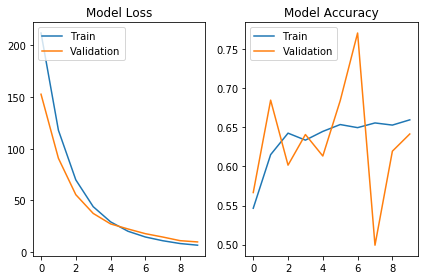

1103/1103 [==============================] - 0s 14us/step

Accurancy: 0.6546


In [11]:
num_epochs = 10

# Create new TF graph
K.clear_session()

# Construct model
text_input = Input(shape=(max_document_length,))
x = Dense(100)(text_input)
preds = Dense(n_logits, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss=loss,
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_token_train, y_token_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_token_test, y_token_test,
                       batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.4f}'.format(scores[1]))

# Save the model
#model.save('word_saved_models/Linear-Token-{:.3f}.h5'.format((scores[1] * 100)))

In [12]:
preds = model.predict(x_token_test, batch_size=batch_size, verbose=1)
preds = preds.argmax(1)
ys = y_token_test.argmax(1)
accuracy_score(ys, preds), f1_score(ys, preds, average='macro'), matthews_corrcoef(ys, preds)

1103/1103 [==============================] - 0s 10us/step


(0.6545784224841342, 0.5238174555961588, 0.0716135618101405)

## Linear - Morph

Train on 5817 samples, validate on 1455 samples
Epoch 1/10
5817/5817 [==============================] - 0s 42us/step - loss: 170.5526 - accuracy: 0.5994 - val_loss: 102.7510 - val_accuracy: 0.6124
Epoch 2/10
5817/5817 [==============================] - 0s 28us/step - loss: 88.8986 - accuracy: 0.6041 - val_loss: 56.1051 - val_accuracy: 0.6845
Epoch 3/10
5817/5817 [==============================] - 0s 27us/step - loss: 45.6683 - accuracy: 0.6330 - val_loss: 33.9174 - val_accuracy: 0.7065
Epoch 4/10
5817/5817 [==============================] - 0s 29us/step - loss: 26.0185 - accuracy: 0.6369 - val_loss: 22.0742 - val_accuracy: 0.6405
Epoch 5/10
5817/5817 [==============================] - 0s 27us/step - loss: 15.6520 - accuracy: 0.6321 - val_loss: 13.1737 - val_accuracy: 0.7416
Epoch 6/10
5817/5817 [==============================] - 0s 28us/step - loss: 9.3199 - accuracy: 0.6288 - val_loss: 9.5527 - val_accuracy: 0.7086
Epoch 7/10
5817/5817 [==============================] - 0s 28us/step -

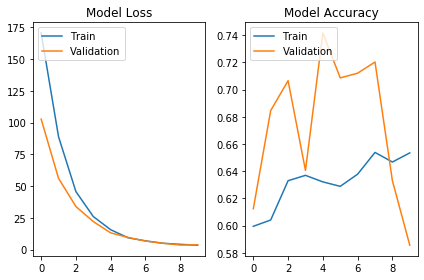

1104/1104 [==============================] - 0s 14us/step

Accurancy: 0.6024


In [13]:
# Create new TF graph
K.clear_session()

# Construct model
text_input = Input(shape=(max_document_length,))
x = Dense(100)(text_input)
preds = Dense(n_logits, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss=loss,
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_morph_train, y_morph_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_morph_test, y_morph_test,
                       batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.4f}'.format(scores[1]))

# Save the model
# model.save('word_saved_models/Linear-Morph-{:.3f}.h5'.format((scores[1] * 100)))

In [14]:
preds = model.predict(x_morph_test, batch_size=batch_size, verbose=1)
preds = preds.argmax(1)
ys = y_morph_test.argmax(1)
accuracy_score(ys, preds), f1_score(ys, preds, average='macro'), matthews_corrcoef(ys, preds)

1104/1104 [==============================] - 0s 13us/step


(0.6023550724637681, 0.5390966539392412, 0.1910366686752529)

## CNN - Token

Train on 5822 samples, validate on 1456 samples
Epoch 1/5
5822/5822 [==============================] - 2s 326us/step - loss: 0.5569 - accuracy: 0.7326 - val_loss: 0.5049 - val_accuracy: 0.7685
Epoch 2/5
5822/5822 [==============================] - 1s 185us/step - loss: 0.5116 - accuracy: 0.7649 - val_loss: 0.4400 - val_accuracy: 0.7960
Epoch 3/5
5822/5822 [==============================] - 1s 186us/step - loss: 0.3877 - accuracy: 0.8370 - val_loss: 0.3425 - val_accuracy: 0.8565
Epoch 4/5
5822/5822 [==============================] - 1s 204us/step - loss: 0.2708 - accuracy: 0.8885 - val_loss: 0.3025 - val_accuracy: 0.8716
Epoch 5/5
5822/5822 [==============================] - 1s 188us/step - loss: 0.1891 - accuracy: 0.9279 - val_loss: 0.2865 - val_accuracy: 0.8757


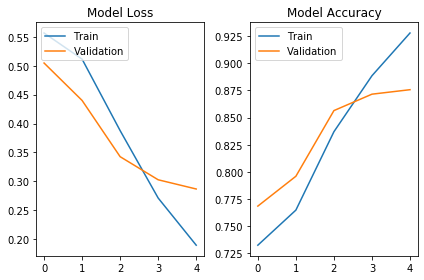

1103/1103 [==============================] - 0s 55us/step

Accurancy: 0.896


In [15]:
num_epochs = 5

# Create new TF graph
K.clear_session()

# Construct model
convs = []
text_input = Input(shape=(max_document_length,))
x = Embedding(vocabulary_size, embedding_size)(text_input)
for fsz in [3, 8]:
    conv = Conv1D(128, fsz, padding='valid', activation='relu')(x)
    pool = MaxPool1D()(conv)
    convs.append(pool)
x = Concatenate(axis=1)(convs)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
preds = Dense(n_logits, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss=loss,
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_token_train, y_token_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_token_test, y_token_test,
                        batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.3f}'.format(scores[1]))

# Save the model
# model.save('word_saved_models/CNN-Token-{:.3f}.h5'.format((scores[1] * 100)))

In [16]:
preds = model.predict(x_token_test, batch_size=batch_size, verbose=1)
preds = preds.argmax(1)
ys = y_token_test.argmax(1)
accuracy_score(ys, preds), f1_score(ys, preds, average='macro'), matthews_corrcoef(ys, preds)

1103/1103 [==============================] - 0s 65us/step


(0.8957388939256573, 0.8226799656109989, 0.645534624894233)

## CNN - Morph

Train on 5817 samples, validate on 1455 samples
Epoch 1/5
5817/5817 [==============================] - 1s 229us/step - loss: 0.5608 - accuracy: 0.7313 - val_loss: 0.5245 - val_accuracy: 0.7649
Epoch 2/5
5817/5817 [==============================] - 1s 202us/step - loss: 0.5157 - accuracy: 0.7612 - val_loss: 0.4424 - val_accuracy: 0.8076
Epoch 3/5
5817/5817 [==============================] - 1s 189us/step - loss: 0.3851 - accuracy: 0.8369 - val_loss: 0.3278 - val_accuracy: 0.8509
Epoch 4/5
5817/5817 [==============================] - 1s 220us/step - loss: 0.2731 - accuracy: 0.8888 - val_loss: 0.2910 - val_accuracy: 0.8756
Epoch 5/5
5817/5817 [==============================] - 1s 194us/step - loss: 0.1986 - accuracy: 0.9257 - val_loss: 0.2687 - val_accuracy: 0.8914


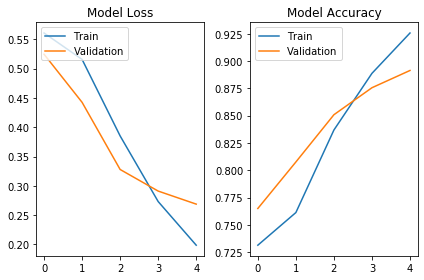

1104/1104 [==============================] - 0s 55us/step

Accurancy: 0.8922


In [17]:
# Create new TF graph
K.clear_session()

# Construct model
convs = []
text_input = Input(shape=(max_document_length,))
x = Embedding(vocabulary_size, embedding_size)(text_input)
for fsz in [3, 8]:
    conv = Conv1D(128, fsz, padding='valid', activation='relu')(x)
    pool = MaxPool1D()(conv)
    convs.append(pool)
x = Concatenate(axis=1)(convs)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
preds = Dense(n_logits, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_morph_train, y_morph_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_morph_test, y_morph_test,
                       batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.4f}'.format(scores[1]))

# Save the model
# model.save('word_saved_models/CNN-Morph-{:.3f}.h5'.format((scores[1] * 100)))

In [18]:
preds = model.predict(x_morph_test, batch_size=batch_size, verbose=1)
preds = preds.argmax(1)
ys = y_morph_test.argmax(1)
accuracy_score(ys, preds), f1_score(ys, preds, average='macro'), matthews_corrcoef(ys, preds)

1104/1104 [==============================] - 0s 64us/step


(0.8922101449275363, 0.806398847022728, 0.6141771320039755)

## LSTM - Token

Train on 5822 samples, validate on 1456 samples
Epoch 1/7
5822/5822 [==============================] - 12s 2ms/step - loss: 0.6142 - accuracy: 0.7022 - val_loss: 0.5522 - val_accuracy: 0.7685
Epoch 2/7
5822/5822 [==============================] - 11s 2ms/step - loss: 0.5992 - accuracy: 0.7181 - val_loss: 0.5384 - val_accuracy: 0.7720
Epoch 3/7
5822/5822 [==============================] - 11s 2ms/step - loss: 0.5965 - accuracy: 0.7190 - val_loss: 0.5464 - val_accuracy: 0.7727
Epoch 4/7
5822/5822 [==============================] - 11s 2ms/step - loss: 0.5260 - accuracy: 0.7458 - val_loss: 0.4075 - val_accuracy: 0.7775
Epoch 5/7
5822/5822 [==============================] - 11s 2ms/step - loss: 0.3543 - accuracy: 0.8513 - val_loss: 0.3953 - val_accuracy: 0.7898
Epoch 6/7
5822/5822 [==============================] - 11s 2ms/step - loss: 0.2482 - accuracy: 0.9031 - val_loss: 0.3207 - val_accuracy: 0.8606
Epoch 7/7
5822/5822 [==============================] - 11s 2ms/step - loss: 0.1860 - acc

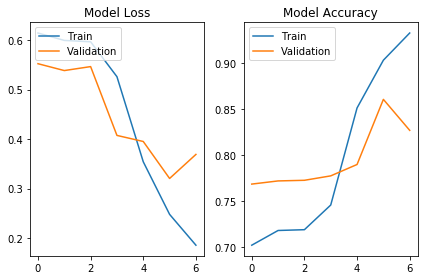

1103/1103 [==============================] - 0s 379us/step

Accurancy: 0.845


In [19]:
num_epochs = 7
lstm_units = 93

# Create new TF graph
K.clear_session()

# Construct model
text_input = Input(shape=(max_document_length,))
x = Embedding(vocabulary_size, embedding_size)(text_input)
x = LSTM(units=lstm_units, return_sequences=True)(x)
x = LSTM(units=lstm_units)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
preds = Dense(n_logits, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_token_train, y_token_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_token_test, y_token_test,
                       batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.3f}'.format(scores[1]))

# Save the model
# model.save('word_saved_models/LSTM-Token-{:.3f}.h5'.format((scores[1] * 100)))

In [20]:
preds = model.predict(x_token_test, batch_size=batch_size, verbose=1)
preds = preds.argmax(1)
ys = y_token_test.argmax(1)
accuracy_score(ys, preds), f1_score(ys, preds, average='macro'), matthews_corrcoef(ys, preds)

1103/1103 [==============================] - 0s 439us/step


(0.8449682683590208, 0.7834187847714628, 0.6057227412260817)

## LSTM - Morph

Train on 5817 samples, validate on 1455 samples
Epoch 1/7
5817/5817 [==============================] - 12s 2ms/step - loss: 0.6101 - accuracy: 0.7108 - val_loss: 0.5411 - val_accuracy: 0.7704
Epoch 2/7
5817/5817 [==============================] - 11s 2ms/step - loss: 0.5835 - accuracy: 0.7251 - val_loss: 0.5197 - val_accuracy: 0.7704
Epoch 3/7
5817/5817 [==============================] - 11s 2ms/step - loss: 0.4471 - accuracy: 0.8018 - val_loss: 0.3369 - val_accuracy: 0.8502
Epoch 4/7
5817/5817 [==============================] - 11s 2ms/step - loss: 0.2787 - accuracy: 0.8900 - val_loss: 0.3124 - val_accuracy: 0.8832
Epoch 5/7
5817/5817 [==============================] - 11s 2ms/step - loss: 0.2101 - accuracy: 0.9235 - val_loss: 0.2884 - val_accuracy: 0.8852
Epoch 6/7
5817/5817 [==============================] - 11s 2ms/step - loss: 0.2129 - accuracy: 0.9300 - val_loss: 0.3157 - val_accuracy: 0.8825
Epoch 7/7
5817/5817 [==============================] - 11s 2ms/step - loss: 0.1500 - acc

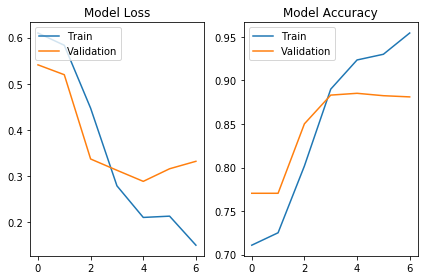

1104/1104 [==============================] - 0s 380us/step

Accurancy: 0.896


In [21]:
num_epochs = 7

# Create new TF graph
K.clear_session()

# Construct model
text_input = Input(shape=(max_document_length,))
x = Embedding(vocabulary_size, embedding_size)(text_input)
x = LSTM(units=lstm_units, return_sequences=True)(x)
x = LSTM(units=lstm_units)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
preds = Dense(n_logits, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_morph_train, y_morph_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_morph_test, y_morph_test,
                       batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.3f}'.format(scores[1]))

# Save the model
# model.save('word_saved_models/LSTM-Morph-{:.3f}.h5'.format((scores[1] * 100)))

In [22]:
preds = model.predict(x_morph_test, batch_size=batch_size, verbose=1)
preds = preds.argmax(1)
ys = y_morph_test.argmax(1)
accuracy_score(ys, preds), f1_score(ys, preds, average='macro'), matthews_corrcoef(ys, preds)

1104/1104 [==============================] - 0s 436us/step


(0.8958333333333334, 0.8176090057708303, 0.6354003187534758)

## BiLSTM - Token

Train on 5822 samples, validate on 1456 samples
Epoch 1/3
5822/5822 [==============================] - 23s 4ms/step - loss: 0.5862 - accuracy: 0.6980 - val_loss: 0.5015 - val_accuracy: 0.7795
Epoch 2/3
5822/5822 [==============================] - 22s 4ms/step - loss: 0.4539 - accuracy: 0.7973 - val_loss: 0.3251 - val_accuracy: 0.8482
Epoch 3/3
5822/5822 [==============================] - 21s 4ms/step - loss: 0.2784 - accuracy: 0.8815 - val_loss: 0.2812 - val_accuracy: 0.8757


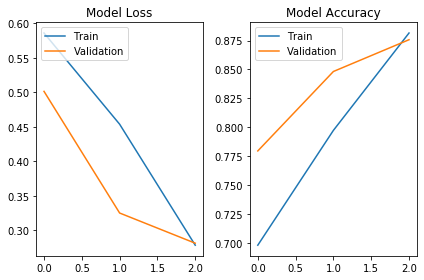

1103/1103 [==============================] - 1s 711us/step

Accurancy: 0.884


In [23]:
num_epochs = 3

# Create new TF graph
K.clear_session()

# Construct model
text_input = Input(shape=(max_document_length,))
x = Embedding(vocabulary_size, embedding_size)(text_input)
x = Bidirectional(LSTM(units=lstm_units, return_sequences=True))(x)
x = Bidirectional(LSTM(units=lstm_units))(x)
x = Dense(128, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
preds = Dense(n_logits, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_token_train, y_token_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_token_test, y_token_test,
                       batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.3f}'.format(scores[1]))

# Save the model
# model.save('word_saved_models/BiLSTM-Token-{:.3f}.h5'.format((scores[1] * 100)))

In [24]:
preds = model.predict(x_token_test, batch_size=batch_size, verbose=1)
preds = preds.argmax(1)
ys = y_token_test.argmax(1)
accuracy_score(ys, preds), f1_score(ys, preds, average='macro'), matthews_corrcoef(ys, preds)

1103/1103 [==============================] - 1s 825us/step


(0.8839528558476881, 0.803024722361739, 0.6062683843386031)

## BiLSTM - Morph

Train on 5817 samples, validate on 1455 samples
Epoch 1/3
5817/5817 [==============================] - 23s 4ms/step - loss: 0.5818 - accuracy: 0.7165 - val_loss: 0.4909 - val_accuracy: 0.7876
Epoch 2/3
5817/5817 [==============================] - 21s 4ms/step - loss: 0.4359 - accuracy: 0.8064 - val_loss: 0.3183 - val_accuracy: 0.8536
Epoch 3/3
5817/5817 [==============================] - 21s 4ms/step - loss: 0.2789 - accuracy: 0.8828 - val_loss: 0.2787 - val_accuracy: 0.8756


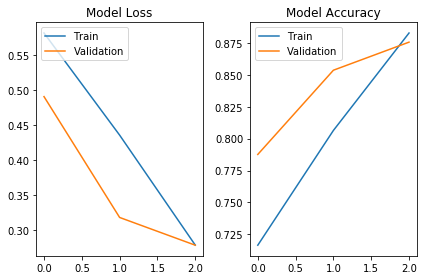

1104/1104 [==============================] - 1s 706us/step

Accurancy: 0.893


In [25]:
# Create new TF graph
K.clear_session()

# Construct model
text_input = Input(shape=(max_document_length,))
x = Embedding(vocabulary_size, embedding_size)(text_input)
x = Bidirectional(LSTM(units=lstm_units, return_sequences=True))(x)
x = Bidirectional(LSTM(units=lstm_units))(x)
x = Dense(128, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
preds = Dense(n_logits, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_morph_train, y_morph_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_morph_test, y_morph_test,
                       batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.3f}'.format(scores[1]))

# Save the model
# model.save('word_saved_models/BiLSTM-Morph-{:.3f}.h5'.format((scores[1] * 100)))

In [26]:
preds = model.predict(x_morph_test, batch_size=batch_size, verbose=1)
preds = preds.argmax(1)
ys = y_morph_test.argmax(1)
accuracy_score(ys, preds), f1_score(ys, preds, average='macro'), matthews_corrcoef(ys, preds)

1104/1104 [==============================] - 1s 822us/step


(0.8931159420289855, 0.8184493946083349, 0.6371242149885228)

## MLP - Token

Train on 5822 samples, validate on 1456 samples
Epoch 1/6
5822/5822 [==============================] - 1s 224us/step - loss: 0.6028 - accuracy: 0.6905 - val_loss: 0.5297 - val_accuracy: 0.7720
Epoch 2/6
5822/5822 [==============================] - 1s 191us/step - loss: 0.5731 - accuracy: 0.7252 - val_loss: 0.5135 - val_accuracy: 0.7692
Epoch 3/6
5822/5822 [==============================] - 1s 190us/step - loss: 0.5520 - accuracy: 0.7415 - val_loss: 0.4983 - val_accuracy: 0.7740
Epoch 4/6
5822/5822 [==============================] - 1s 190us/step - loss: 0.5172 - accuracy: 0.7597 - val_loss: 0.4582 - val_accuracy: 0.8008
Epoch 5/6
5822/5822 [==============================] - 1s 189us/step - loss: 0.4530 - accuracy: 0.7994 - val_loss: 0.4026 - val_accuracy: 0.8194
Epoch 6/6
5822/5822 [==============================] - 1s 190us/step - loss: 0.3608 - accuracy: 0.8518 - val_loss: 0.3243 - val_accuracy: 0.8565


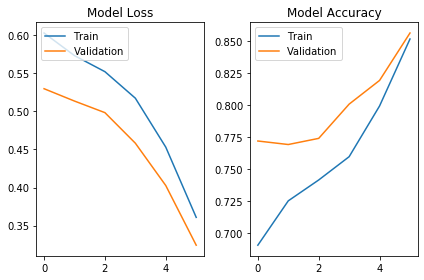

1103/1103 [==============================] - 0s 30us/step

Accurancy: 0.867


In [27]:
num_epochs = 6

# Create new TF graph
K.clear_session()

# Construct model
text_input = Input(shape=(max_document_length,))
x = Embedding(vocabulary_size, embedding_size)(text_input)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
preds = Dense(n_logits, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_token_train, y_token_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_token_test, y_token_test,
                       batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.3f}'.format(scores[1]))

# Save the model
# model.save('word_saved_models/MLP-Token-{:.3f}.h5'.format((scores[1] * 100)))

In [28]:
preds = model.predict(x_token_test, batch_size=batch_size, verbose=1)
preds = preds.argmax(1)
ys = y_token_test.argmax(1)
accuracy_score(ys, preds), f1_score(ys, preds, average='macro'), matthews_corrcoef(ys, preds)

1103/1103 [==============================] - 0s 47us/step


(0.8667271078875793, 0.775114321498267, 0.5506159517272798)

## MLP - Morph

Train on 5817 samples, validate on 1455 samples
Epoch 1/6
5817/5817 [==============================] - 1s 223us/step - loss: 0.6076 - accuracy: 0.6835 - val_loss: 0.5259 - val_accuracy: 0.7711
Epoch 2/6
5817/5817 [==============================] - 1s 191us/step - loss: 0.5772 - accuracy: 0.7229 - val_loss: 0.5117 - val_accuracy: 0.7684
Epoch 3/6
5817/5817 [==============================] - 1s 189us/step - loss: 0.5546 - accuracy: 0.7396 - val_loss: 0.5028 - val_accuracy: 0.7725
Epoch 4/6
5817/5817 [==============================] - 1s 189us/step - loss: 0.5223 - accuracy: 0.7559 - val_loss: 0.4583 - val_accuracy: 0.7876
Epoch 5/6
5817/5817 [==============================] - 1s 188us/step - loss: 0.4515 - accuracy: 0.8009 - val_loss: 0.3918 - val_accuracy: 0.8172
Epoch 6/6
5817/5817 [==============================] - 1s 189us/step - loss: 0.3576 - accuracy: 0.8496 - val_loss: 0.3415 - val_accuracy: 0.8495


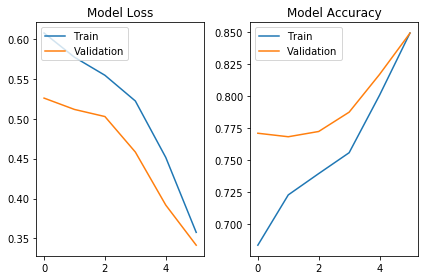

1104/1104 [==============================] - 0s 29us/step

Accurancy: 0.861


In [29]:
# Create new TF graph
K.clear_session()

# Construct model
text_input = Input(shape=(max_document_length,))
x = Embedding(vocabulary_size, embedding_size)(text_input)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
preds = Dense(n_logits, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_morph_train, y_morph_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_morph_test, y_morph_test,
                       batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.3f}'.format(scores[1]))

# Save the model
# model.save('word_saved_models/MLP-Morph-{:.3f}.h5'.format((scores[1] * 100)))

In [30]:
preds = model.predict(x_morph_test, batch_size=batch_size, verbose=1)
preds = preds.argmax(1)
ys = y_morph_test.argmax(1)
accuracy_score(ys, preds), f1_score(ys, preds, average='macro'), matthews_corrcoef(ys, preds)

1104/1104 [==============================] - 0s 47us/step


(0.8614130434782609, 0.7650629305656588, 0.5303813775773627)